Solving IP-Method.

 Setup Mesh 64 x 2.
         Mode 1 = 27.6 kHz
         Mode 2 = 173.0 kHz
         Mode 3 = 484.6 kHz
         Mode 4 = 950.6 kHz
         Mode 5 = 1550.7 kHz


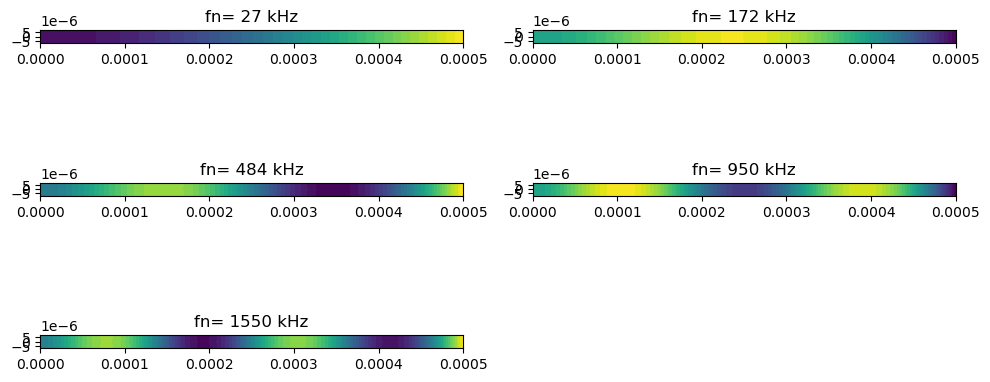


         Solved in 0 minutes and 0 seconds.


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import Plate.plate_fem as pt
import numpy as np
import time

# Specify geometry
aspect_ratio = 32
l_c = 500e-6  # length of beam in m
h_c = 5e-6  # thickness of the beam in m
w_c = l_c / aspect_ratio  # width in m

# Specify material of plate -> Silicon
e_c = 169E9  # Young's Modulus in Pa
rho_c = 2.33E3  # Density in kg/m^3
nu_c = 0.3  # Poisson Coefficient, dimensionless

n_eig = 5
# Basic objects, shared by all classes
geometry = pt.Geometry(l_c, w_c, h_c)
mat = pt.Material(e_c, rho_c, nu_c)

# Mesh specification -> To solve Kirchhoff-Love plate equation
n_x = 64  # Number of elements in length l_c (x-direction)
n_y = int(n_x/aspect_ratio)  # Number of elements in width w_c (y-direction)

print('Solving IP-Method.')
t = time.time()
plate = pt.InteriorPenalty()
plate.geometry = geometry
plate.mat = mat
plate.meshing(n_x, n_y, 'crossed')
plate.preliminary_setup()
plate.setup_eigenvalues_problem()
plate.solve_n_eigenvalues(n_eig, plate.k_matrix, plate.m_matrix)
plate.plot_eigenmodes(n_eig)
tt = time.time() - t
print('\n         Solved in %d minutes and %d seconds.' % (np.floor(tt/60), tt % 60))

